      day_0     day_1     day_2     day_3     day_4     day_5     day_6
0  2.024836  1.474723  1.130008  0.889291  0.590681  0.434553  0.409558
1  2.038372  1.458163  1.124751  0.789968  0.579102  0.458358  0.234934
2  1.913754  1.453522  1.046982  0.828852  0.556987  0.375645  0.403880
3  1.988711  1.485013  1.026386  0.785920  0.607935  0.388711  0.349383
4  1.969968  1.467052  1.067538  0.905753  0.601714  0.393375  0.371725


<Axes: title={'center': 'Exponential Decay Timecourse'}, xlabel='Time (days)', ylabel='Value'>

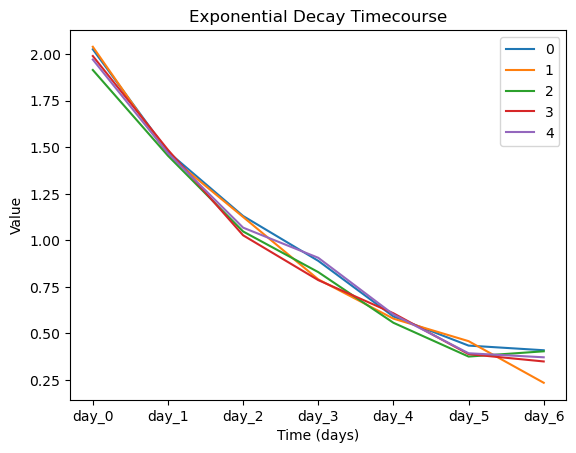

In [4]:
import numpy as np
import pandas as pd

def generate_exponential_decay_timecourse(n_samples=100, n_timepoints=10, decay_rate=0.2, initial_value=1.0, noise_std=0.0, random_seed=None):
    """
    Generate a DataFrame of exponential decay timecourse data.

    Each row is a sample, each column is a timepoint (in days: 0, 1, 2, ...).
    Values follow: value = initial_value * exp(-decay_rate * t) + noise

    Args:
        n_samples (int): Number of samples (rows).
        n_timepoints (int): Number of timepoints (columns).
        decay_rate (float): Exponential decay rate.
        initial_value (float): Starting value at t=0.
        noise_std (float): Standard deviation of Gaussian noise added to each value.
        random_seed (int or None): Seed for reproducibility.

    Returns:
        pd.DataFrame: DataFrame of shape (n_samples, n_timepoints) with timepoints as columns.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    timepoints = np.arange(n_timepoints)
    # Generate base exponential decay curve
    base_curve = initial_value * np.exp(-decay_rate * timepoints)
    # Repeat for all samples and add noise
    data = np.tile(base_curve, (n_samples, 1))
    if noise_std > 0:
        data += np.random.normal(0, noise_std, size=data.shape)
    # Create DataFrame with timepoint columns labeled by day
    columns = [f"day_{t}" for t in timepoints]
    df = pd.DataFrame(data, columns=columns)
    return df

# Example usage:
df = generate_exponential_decay_timecourse(n_samples=5, n_timepoints=7, decay_rate=0.3, initial_value=2.0, noise_std=0.05, random_seed=42)
print(df)

df.transpose().plot(title='Exponential Decay Timecourse', xlabel='Time (days)', ylabel='Value')

      day_0     day_1     day_2     day_3     day_4     day_5     day_6  \
0 -0.021160  0.022420  0.016647  0.017300  0.170854  0.533029  0.769041   
1 -0.013025  0.000578  0.040815  0.034648  0.173546  0.491313  0.861693   
2  0.015300  0.032287 -0.007730  0.070942  0.157348  0.487245  0.835717   
3  1.165697  1.186749  1.122218  0.981615  0.838428  0.721288  0.534908   
4  1.173832  1.164908  1.146386  0.998963  0.841120  0.679572  0.627561   
5  1.202157  1.196617  1.097841  1.035258  0.824922  0.675504  0.601584   

      day_7     day_8     day_9  
0  0.943996  1.014332  0.980193  
1  0.996310  1.009094  1.005251  
2  0.924001  0.986212  0.980292  
3  0.524620  0.537909  0.487350  
4  0.576934  0.532671  0.512409  
5  0.504624  0.509789  0.487450  


<Axes: title={'center': 'Sigmoidal Timecourse'}, xlabel='Time (days)', ylabel='Value'>

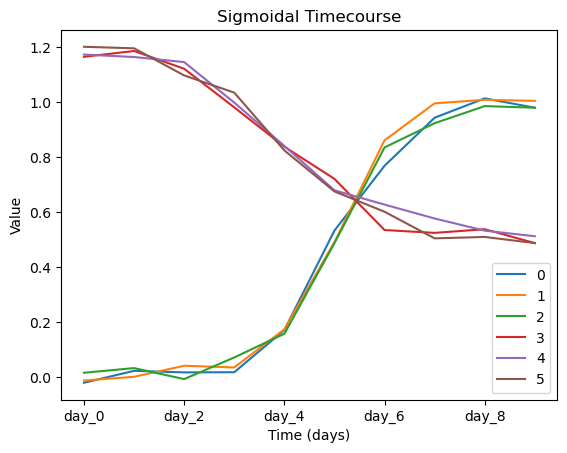

In [1]:
import numpy as np
import pandas as pd

def generate_sigmoidal_timecourse(
    n_samples=100,
    n_timepoints=10,
    start_value=0.0,
    end_value=1.0,
    midpoint=5,
    steepness=1.0,
    noise_std=0.0,
    random_seed=None
):
    """
    Generate a DataFrame of sigmoidal (logistic) timecourse data.

    Each row is a sample, each column is a timepoint (in days: 0, 1, 2, ...).
    Values follow: value = start_value + (end_value - start_value) / (1 + exp(-steepness * (t - midpoint))) + noise

    Args:
        n_samples (int): Number of samples (rows).
        n_timepoints (int): Number of timepoints (columns).
        start_value (float): Initial value at t=0.
        end_value (float): Final value as t→∞.
        midpoint (float): Timepoint at which the curve is halfway between start and end.
        steepness (float): Controls the slope of the transition.
        noise_std (float): Standard deviation of Gaussian noise added to each value.
        random_seed (int or None): Seed for reproducibility.

    Returns:
        pd.DataFrame: DataFrame of shape (n_samples, n_timepoints) with timepoints as columns.

    Example:
        >>> df = generate_sigmoidal_timecourse(
        ...     n_samples=5, n_timepoints=7, start_value=0, end_value=1, midpoint=3, steepness=2, noise_std=0.01, random_seed=42)
        >>> print(df)
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    timepoints = np.arange(n_timepoints)
    # Sigmoid/logistic function
    base_curve = start_value + (end_value - start_value) / (1 + np.exp(-steepness * (timepoints - midpoint)))
    # Repeat for all samples and add noise
    data = np.tile(base_curve, (n_samples, 1))
    if noise_std > 0:
        data += np.random.normal(0, noise_std, size=data.shape)
    # Create DataFrame with timepoint columns labeled by day
    columns = [f"day_{t}" for t in timepoints]
    df = pd.DataFrame(data, columns=columns)
    return df

# Example usage:
df1 = generate_sigmoidal_timecourse(n_samples=3, n_timepoints=10, start_value=0, end_value=1, midpoint=5, steepness=1.5, noise_std=0.02, random_seed=123)
df2 = generate_sigmoidal_timecourse(n_samples=3, n_timepoints=10, start_value=1.2, end_value=0.5, midpoint=4, steepness=1, noise_std=0.02, random_seed=123)
df = pd.concat([df1, df2], axis=0, ignore_index=True)
print(df)

df.transpose().plot(title='Sigmoidal Timecourse', xlabel='Time (days)', ylabel='Value')


   ('feature1', 0)  ('feature1', 1)  ('feature1', 2)  ('feature1', 3)  \
0         0.374407         0.363972         0.382817         0.362619   
1         0.974247         1.028110         1.122651         1.293601   
2         0.772058         0.816239         0.887808         0.994799   
3         0.602276         0.592217         0.602375         0.615163   
4         0.153822         0.159596         0.170868         0.151631   
5         0.148974         0.152718         0.152077         0.141388   
6         0.064923         0.087271         0.149087         0.247876   
7         0.871858         0.866403         0.900825         0.917795   
8         0.602114         0.596097         0.585719         0.602513   
9         0.712798         0.730587         0.725436         0.802570   

   ('feature1', 4)  ('feature1', 5)  ('feature1', 6)  ('feature1', 7)  \
0         0.378214         0.363363         0.398826         0.476156   
1         1.490595         1.662845         1.8179

<Axes: title={'center': 'Sigmoidal Timecourses (spread)'}, xlabel='Time (days)', ylabel='Value'>

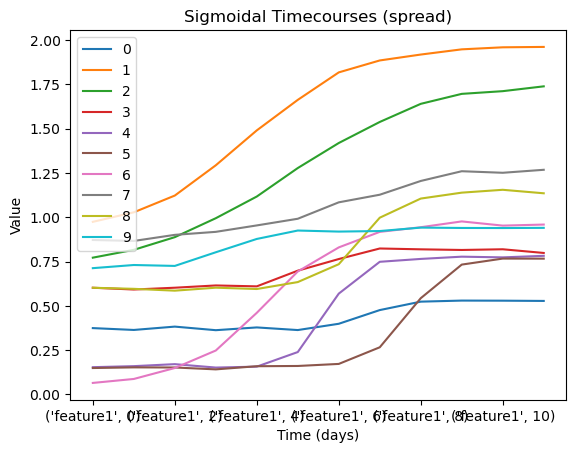

In [6]:
import numpy as np
import pandas as pd

def generate_sigmoidal_timecourse(
    n_samples=10,
    n_timepoints=10,
    start_values=None,
    end_values=None,
    midpoints=None,
    steepnesses=None,
    noise_std=0.0,
    random_seed=None
):
    """
    Generate a DataFrame of sigmoidal (logistic) timecourse data with per-sample parameters.

    Each row is a sample, each column is a timepoint (in days: 0, 1, 2, ...).
    Each sample can have its own start_value, end_value, midpoint, and steepness.

    Args:
        n_samples (int): Number of samples (rows).
        n_timepoints (int): Number of timepoints (columns).
        start_values (array-like): Start values for each sample.
        end_values (array-like): End values for each sample.
        midpoints (array-like): Midpoints for each sample.
        steepnesses (array-like): Steepness for each sample.
        noise_std (float): Standard deviation of Gaussian noise added to each value.
        random_seed (int or None): Seed for reproducibility.

    Returns:
        pd.DataFrame: DataFrame of shape (n_samples, n_timepoints) with timepoints as columns.
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    timepoints = np.arange(n_timepoints)

    # If any parameter is None, generate random values for it
    if start_values is None:
        start_values = np.random.uniform(0, 1, n_samples)
    if end_values is None:
        end_values = np.random.uniform(0.5, 2, n_samples)
    if midpoints is None:
        midpoints = np.random.uniform(3, n_timepoints-3, n_samples)
    if steepnesses is None:
        steepnesses = np.random.uniform(0.5, 2.5, n_samples)

    data = np.zeros((n_samples, n_timepoints))
    for i in range(n_samples):
        curve = start_values[i] + (end_values[i] - start_values[i]) / (
            1 + np.exp(-steepnesses[i] * (timepoints - midpoints[i]))
        )
        if noise_std > 0:
            curve += np.random.normal(0, noise_std, size=curve.shape)
        data[i, :] = curve

    columns = [f"('feature1', {t})" for t in timepoints]
    df = pd.DataFrame(data, columns=columns)
    return df

# Example: Generate 10 samples with a spread of parameters
df = generate_sigmoidal_timecourse(
    n_samples=10,
    n_timepoints=12,
    noise_std=0.01,
    random_seed=42
)
print(df)

# Optional: visualize
df.transpose().plot(title='Sigmoidal Timecourses (spread)', xlabel='Time (days)', ylabel='Value')

In [20]:
import ukko
import ukko.core
import torch
from ukko.core import DualAttentionModule

# Generate the data
df = generate_sigmoidal_timecourse(n_samples=100, n_timepoints=12, noise_std=0.01, random_seed=42)

# 2. Convert to 3D array using ukko.utils.convert_to_3d_df
df_multiindex, data_3d = ukko.utils.convert_to_3d_df(df)

print(df_multiindex)
print(data_3d.shape)  # Should be (n_samples, n_features, n_timepoints)

# 3. Feed into DualAttentionModule as embedding
n_samples, n_features, n_timepoints = data_3d.shape
d_model = 16
n_heads = 4
n_kv_heads = 2
dropout = 0.1

# Convert numpy array to torch tensor
x = torch.tensor(data_3d, dtype=torch.float32)

# Initialize DualAttentionModule
dual_attn = DualAttentionModule(
    n_features=n_features,
    time_steps=n_timepoints,
    d_model=d_model,
    n_heads=n_heads,
    n_kv_heads=n_kv_heads,
    dropout=dropout
)

# Add a dummy embedding dimension for input projection (if needed)
# [batch_size, n_features, time_steps, 1]
x_embed = x.unsqueeze(-1)

# Forward pass (is_first_module=True for input projection)
with torch.no_grad():
    out, feat_weights, time_weights = dual_attn(x_embed, is_first_module=True)

print("Input shape:", x_embed.shape)
print("DualAttentionModule output shape:", out.shape)
print("Feature attention shape:", feat_weights.shape)
print("Time attention shape:", time_weights.shape)

Feature    feature1                                                    \
Timepoint        0         1         2         3         4         5    
0          0.390315  0.379660  0.390129  0.386822  0.403975  0.415780   
1          0.964394  0.968489  1.000763  1.114417  1.295432  1.401227   
2          0.736572  0.728524  0.733953  0.776946  0.857075  0.927190   
3          0.601768  0.613413  0.607243  0.597106  0.598742  0.590244   
4          0.154935  0.160064  0.163119  0.153408  0.168083  0.223012   
..              ...       ...       ...       ...       ...       ...   
95         0.499451  0.476191  0.501360  0.497931  0.510108  0.534641   
96         0.539432  0.526680  0.510778  0.527217  0.535048  0.519828   
97         0.422810  0.439146  0.494939  0.632247  1.013749  1.448306   
98         0.019903  0.051020  0.019914  0.028281  0.048340  0.099552   
99         0.101055  0.117835  0.177636  0.514633  1.250623  1.604536   

Feature                                           

In [21]:
import torch
import torch.nn as nn
from ukko.core import DualAttentionModule

class DualAttentionAutoencoder(nn.Module):
    """
    Autoencoder for longitudinal tabular data using DualAttentionModule as encoder embedding.

    Input shape: [batch_size, n_features, n_timepoints, 1]
    Output shape: [batch_size, n_features, n_timepoints, 1]
    """
    def __init__(
        self,
        n_features,
        n_timepoints,
        d_model=16,
        n_heads=4,
        n_kv_heads=2,
        dropout=0.1,
        latent_dim=8
    ):
        super().__init__()
        # Encoder: DualAttentionModule
        self.encoder = DualAttentionModule(
            n_features=n_features,
            time_steps=n_timepoints,
            d_model=d_model,
            n_heads=n_heads,
            n_kv_heads=n_kv_heads,
            dropout=dropout
        )
        # Project to latent space
        self.to_latent = nn.Sequential(
            nn.Flatten(start_dim=1),  # flatten all but batch
            nn.Linear(n_features * n_timepoints * d_model, latent_dim),
            nn.ReLU()
        )
        # Project back from latent space
        self.from_latent = nn.Sequential(
            nn.Linear(latent_dim, n_features * n_timepoints * d_model),
            nn.ReLU()
        )
        # Decoder: simple linear projection to original shape
        self.decoder = nn.Sequential(
            nn.Linear(d_model, 1)
        )
        self.n_features = n_features
        self.n_timepoints = n_timepoints
        self.d_model = d_model

    def forward(self, x):
        # x: [batch, n_features, n_timepoints, 1]
        z, _, _ = self.encoder(x, is_first_module=True)  # [batch, n_features, n_timepoints, d_model]
        z_flat = self.to_latent(z)
        z_recon = self.from_latent(z_flat)
        z_recon = z_recon.view(-1, self.n_features, self.n_timepoints, self.d_model)
        out = self.decoder(z_recon)  # [batch, n_features, n_timepoints, 1]
        return out

# Example usage:
# x_embed: [batch, n_features, n_timepoints, 1] (see previous cell)
autoencoder = DualAttentionAutoencoder(
    n_features=n_features,
    n_timepoints=n_timepoints,
    d_model=d_model,
    n_heads=n_heads,
    n_kv_heads=n_kv_heads,
    dropout=dropout,
    latent_dim=8
)

# Forward pass
with torch.no_grad():
    x_recon = autoencoder(x_embed)
print("Autoencoder output shape:", x_recon.shape)

Autoencoder output shape: torch.Size([100, 1, 12, 1])


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Prepare data for training
# x_embed: [batch, n_features, n_timepoints, 1] (already created above)
# We'll use the same data as both input and target for autoencoder training

batch_size = 32
num_epochs = 50
learning_rate = 1e-3

# Create TensorDataset and DataLoader
dataset = TensorDataset(x_embed, x_embed)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize model and optimizer
autoencoder = DualAttentionAutoencoder(
    n_features=n_features,
    n_timepoints=n_timepoints,
    d_model=d_model,
    n_heads=n_heads,
    n_kv_heads=n_kv_heads,
    dropout=dropout,
    latent_dim=8
)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()

# Training loop
autoencoder.train()
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for xb, yb in loader:
        optimizer.zero_grad()
        out = autoencoder(xb)
        loss = loss_fn(out, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * xb.size(0)
    epoch_loss /= len(dataset)
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.6f}")

# After training, you can evaluate or visualize reconstructions

Epoch 1/50 - Loss: 0.418554
Epoch 10/50 - Loss: 0.045340
Epoch 20/50 - Loss: 0.015459
Epoch 30/50 - Loss: 0.009181
Epoch 40/50 - Loss: 0.006668
Epoch 50/50 - Loss: 0.005880


Epoch 1/150 - Train Loss: 0.970630 - Val Loss: 0.736006
Epoch 10/150 - Train Loss: 0.301348 - Val Loss: 0.284665
Epoch 20/150 - Train Loss: 0.097689 - Val Loss: 0.090767
Epoch 30/150 - Train Loss: 0.062265 - Val Loss: 0.050861
Epoch 40/150 - Train Loss: 0.054411 - Val Loss: 0.043922
Epoch 50/150 - Train Loss: 0.042846 - Val Loss: 0.032555
Epoch 60/150 - Train Loss: 0.027431 - Val Loss: 0.017749
Epoch 70/150 - Train Loss: 0.019253 - Val Loss: 0.013629
Epoch 80/150 - Train Loss: 0.015479 - Val Loss: 0.009920
Epoch 90/150 - Train Loss: 0.013563 - Val Loss: 0.011486
Epoch 100/150 - Train Loss: 0.012073 - Val Loss: 0.012656
Epoch 110/150 - Train Loss: 0.009348 - Val Loss: 0.006624
Epoch 120/150 - Train Loss: 0.009225 - Val Loss: 0.005582
Epoch 130/150 - Train Loss: 0.008366 - Val Loss: 0.005757
Epoch 140/150 - Train Loss: 0.007402 - Val Loss: 0.004686
Epoch 150/150 - Train Loss: 0.007138 - Val Loss: 0.003675


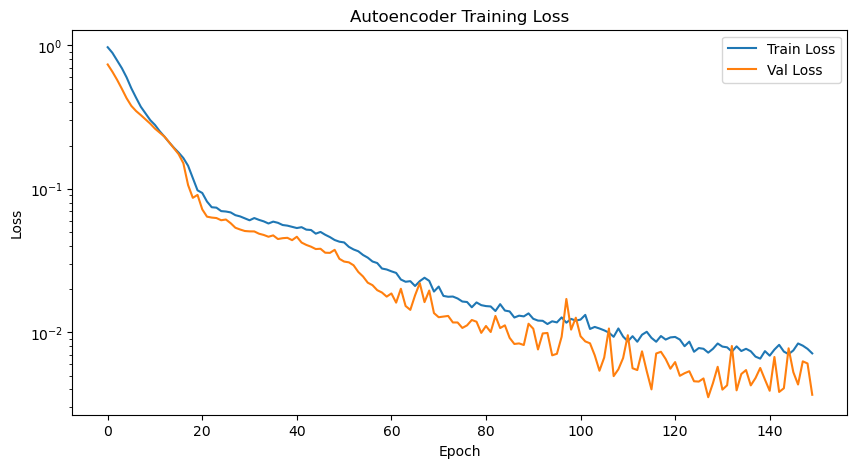

In [38]:
import torch
from torch.utils.data import TensorDataset, DataLoader, random_split

# Split dataset into train and validation sets (e.g., 80% train, 20% val)
val_fraction = 0.2
n_total = x_embed.shape[0]
n_val = int(n_total * val_fraction)
n_train = n_total - n_val

train_dataset, val_dataset = random_split(TensorDataset(x_embed, x_embed), [n_train, n_val])

batch_size = 32
num_epochs = 150
learning_rate = 1e-3

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

autoencoder = DualAttentionAutoencoder(
    n_features=n_features,
    n_timepoints=n_timepoints,
    d_model=d_model,
    n_heads=n_heads,
    n_kv_heads=n_kv_heads,
    dropout=dropout,
    latent_dim=8
)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)
loss_fn = torch.nn.MSELoss()

# Training loop with validation
train_loss_history = []
val_loss_history = []
for epoch in range(num_epochs):
    autoencoder.train()
    train_loss = 0.0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = autoencoder(xb)
        loss = loss_fn(out, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
    train_loss /= len(train_dataset)
    train_loss_history.append(train_loss)

    # Validation
    autoencoder.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in val_loader:
            out = autoencoder(xb)
            loss = loss_fn(out, yb)
            val_loss += loss.item() * xb.size(0)
    val_loss /= len(val_dataset)
    val_loss_history.append(val_loss)

    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.6f} - Val Loss: {val_loss:.6f}")

# Plot training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.yscale('log')  
plt.title("Autoencoder Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

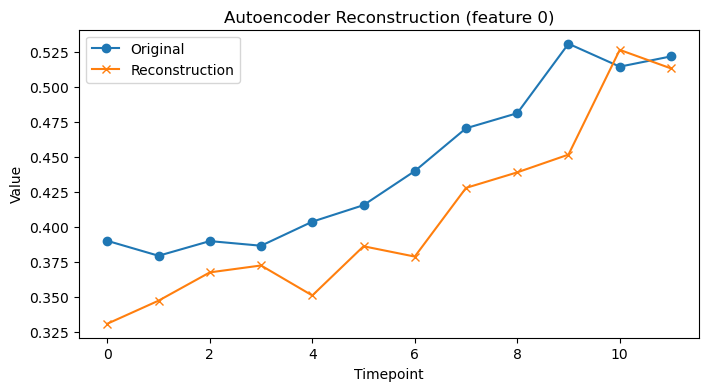

In [44]:
import matplotlib.pyplot as plt

# Switch to evaluation mode
autoencoder.eval()

# Get a batch of data
#with torch.no_grad():
#    xb, yb = next(iter(loader))
#    x_recon = autoencoder(xb)

with torch.no_grad():
  x_recon = autoencoder(x_embed)

# Select a sample to visualize
sample_idx = 0
original = x_embed[sample_idx, 0, :, 0].cpu().numpy()      # [timepoints]
reconstructed = x_recon[sample_idx, 0, :, 0].cpu().numpy()  # [timepoints]

plt.figure(figsize=(8, 4))
plt.plot(original, label="Original", marker='o')
plt.plot(reconstructed, label="Reconstruction", marker='x')
plt.title("Autoencoder Reconstruction (feature 0)")
plt.xlabel("Timepoint")
plt.ylabel("Value")
plt.legend()

Text(0.5, 0, 'PC1')

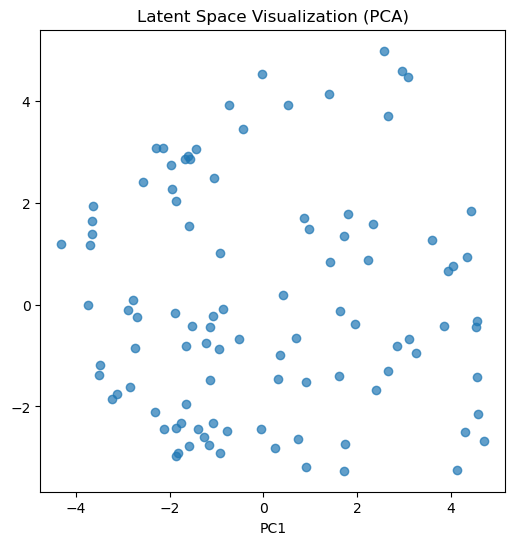

In [47]:
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Switch to evaluation mode
autoencoder.eval()

# Get latent representations for all samples
latents = []
with torch.no_grad():
    for xb in DataLoader(TensorDataset(x_embed), batch_size=64):
        xb = xb[0]  # TensorDataset returns a tuple (data, target), we only need data
        # Forward through encoder and to_latent only
        z, _, _ = autoencoder.encoder(xb, is_first_module=True)
        z_flat = autoencoder.to_latent(z)  # shape: [batch, latent_dim]
        latents.append(z_flat.cpu())
latents = torch.cat(latents, dim=0).numpy()  # shape: [n_samples, latent_dim]

# Project latent space to 2D using PCA
pca = PCA(n_components=2)
latents_2d = pca.fit_transform(latents)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(latents_2d[:, 0], latents_2d[:, 1], alpha=0.7)
plt.title("Latent Space Visualization (PCA)")
plt.xlabel("PC1")